## Overlap of Political Organisations and Authors of Academic Research

We look at the overlap between members of various organisations and the authors of the studies in REMP, IM and IMR:

- REMP Board
- ICEM directors and depuity directors
- Dutch Government



In [123]:
import pandas as pd

records_file = '../data/main-review-article-records.csv'

# load the csv data into a data frame
df = pd.read_csv(records_file)
# show the first and last records of the dataset to demonstrate what the records look like
df

,Unnamed: 0,article_title,article_doi,article_author,article_author_index_name,article_author_affiliation,article_page_range,article_pub_date,article_pub_year,issue_section,issue_number,issue_title,issue_page_range,issue_pub_date,issue_pub_year,volume,journal,publisher,article_type
0,9,The importance of emigration for the solution ...,NaN,"Wander, H.","Wander, H.",NaN,NaN,1951,1951,article,NaN,NaN,NaN,1951,1951,1,Publications of the research group for europea...,Staatsdrukkerij,main
1,11,European emigration overseas past and future,NaN,"Citroen, H.A.","Citroen, H.A.",NaN,NaN,1951,1951,article,NaN,NaN,NaN,1951,1951,2,Publications of the research group for europea...,Staatsdrukkerij,main
2,13,Some aspects of migration problems in the Neth...,NaN,"Beijer, G. && Oudegeest, J.J.","Beijer, G. && Oudegeest, J.J.",&&,NaN,1952,1952,article,NaN,NaN,NaN,1952,1952,3_1,Publications of the research group for europea...,Staatsdrukkerij,main
3,15,Some quantitative aspects of future population...,NaN,"Brink, van den, T.","Brink, van den, T.",NaN,NaN,1952,1952,article,NaN,NaN,NaN,1952,1952,3_2,Publications of the research group for europea...,Staatsdrukkerij,main
4,17,"The refugees as a burden, a stimulus, and a ch...",NaN,"Edding, F.","Edding, F.",NaN,NaN,1951,1951,article,NaN,NaN,NaN,1951,1951,4,Publications of the research group for europea...,Staatsdrukkerij,main
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4277,3907,Chapter Four: Going North,https://journals.sagepub.com/doi/pdf/10.1177/0...,NaN,NaN,NaN,63-76,"Jan 1, 1986",1986,Article,1_suppl,"International Migration Review - Volume 20, Nu...",NaN,"Jan 01, 1986",1986,20,International Migration Review,Sage Publishing,main
4278,3908,Chapter Five: The New York Labor Market,https://journals.sagepub.com/doi/pdf/10.1177/0...,NaN,NaN,NaN,77-109,"Jan 1, 1986",1986,Article,1_suppl,"International Migration Review - Volume 20, Nu...",NaN,"Jan 01, 1986",1986,20,International Migration Review,Sage Publishing,main
4279,3909,Chapter Six: The Settlement Process,https://journals.sagepub.com/doi/pdf/10.1177/0...,NaN,NaN,NaN,110-119,"Jan 1, 1986",1986,Article,1_suppl,"International Migration Review - Volume 20, Nu...",NaN,"Jan 01, 1986",1986,20,International Migration Review,Sage Publishing,main
4280,3910,Chapter Seven: Conclusion,https://journals.sagepub.com/doi/pdf/10.1177/0...,NaN,NaN,NaN,120-133,"Jan 1, 1986",1986,Article,1_suppl,"International Migration Review - Volume 20, Nu...",NaN,"Jan 01, 1986",1986,20,International Migration Review,Sage Publishing,main


In [124]:
def map_dataset(publisher, article_type):
    # all REMP and IM (published by Wiley) articles are bunlded in a single dataset
    if publisher == 'Staatsdrukkerij' or publisher == 'Wiley':
        return 'REMP_IM'
    # The IMR articles are separated in review articles and research articles
    return 'IMR_research' if article_type == 'main' else 'IMR_review'

df['dataset'] = df.apply(lambda x: map_dataset(x['publisher'], x['article_type']), axis=1)
df.dataset.value_counts()

IMR_review      1842
IMR_research    1539
REMP_IM          901
Name: dataset, dtype: int64

In [125]:
columns = ['article_title', 'issue_pub_year', 'publisher', 'article_type']


## Clustering Author Names

We want to see which authors published in both journals, and how often. This requires a number of transformations:

1. splitting records of multi-author papers into a record per author
2. normalising author names such that variant spellings are mapped to a single version. 

The latter step is always a risky operation, because using only the surface form of a name can results in two persons with similar names being considered as a single person. Given that this dataset narrowly focuses in only authors of articles in the two journals, we assume the chance that two authors have the same surname and initials is low. 


#### Splitting multi-author records

In [126]:
# Code adapted from https://stackoverflow.com/questions/50731229/split-cell-into-multiple-rows-in-pandas-dataframe

import numpy as np
from itertools import chain

# return list from series of comma-separated strings
def chainer(s):
    return list(chain.from_iterable(s.fillna('').str.split(' && ')))

# calculate lengths of splits
lens = df['article_author'].fillna('').str.split(' && ').map(len)

# create new dataframe, repeating or chaining as appropriate
df_split = pd.DataFrame({
    'journal': np.repeat(df['journal'], lens),
    'issue_pub_year': np.repeat(df['issue_pub_year'], lens),
    'publisher': np.repeat(df['publisher'], lens),
    'dataset': np.repeat(df['dataset'], lens),
    'article_author': chainer(df['article_author']),
    'article_author_index_name': chainer(df['article_author_index_name']),
    'article_author_affiliation': chainer(df['article_author_affiliation'])
})

df_split = df_split.reset_index(drop=True)
df_split

,journal,issue_pub_year,publisher,dataset,article_author,article_author_index_name,article_author_affiliation
0,Publications of the research group for europea...,1951,Staatsdrukkerij,REMP_IM,"Wander, H.","Wander, H.",
1,Publications of the research group for europea...,1951,Staatsdrukkerij,REMP_IM,"Citroen, H.A.","Citroen, H.A.",
2,Publications of the research group for europea...,1952,Staatsdrukkerij,REMP_IM,"Beijer, G.","Beijer, G.",
3,Publications of the research group for europea...,1952,Staatsdrukkerij,REMP_IM,"Oudegeest, J.J.","Oudegeest, J.J.",
4,Publications of the research group for europea...,1952,Staatsdrukkerij,REMP_IM,"Brink, van den, T.","Brink, van den, T.",
...,...,...,...,...,...,...,...
4824,International Migration Review,1986,Sage Publishing,IMR_research,,,
4825,International Migration Review,1986,Sage Publishing,IMR_research,,,
4826,International Migration Review,1986,Sage Publishing,IMR_research,,,
4827,International Migration Review,1986,Sage Publishing,IMR_research,,,


In [127]:
df_split[df_split.article_author.str.contains('van de')]

,journal,issue_pub_year,publisher,dataset,article_author,article_author_index_name,article_author_affiliation
4,Publications of the research group for europea...,1952,Staatsdrukkerij,REMP_IM,"Brink, van den, T.","Brink, van den, T.",
45,REMP-bulletin,1953,Staatsdrukkerij,REMP_IM,"Mast, van der, W.","Mast, van der, W.",
57,REMP-bulletin,1954,Staatsdrukkerij,REMP_IM,"Brink, van den, T","Brink, van den, T",
65,REMP-bulletin,1954,Staatsdrukkerij,REMP_IM,"Mast, van der, W.","Mast, van der, W.",
70,REMP-bulletin,1954,Staatsdrukkerij,REMP_IM,"Beld, van den, C.A.","Beld, van den, C.A.",
75,REMP-bulletin,1954,Staatsdrukkerij,REMP_IM,"Beld, van den, C.A.","Beld, van den, C.A.",
3416,International Migration Review,1971,Sage Publishing,IMR_review,Pierre L. van den Berghe,"van den Berghe, Pierre L",University of Washington
3816,International Migration Review,1983,Sage Publishing,IMR_review,Pierre L. van den Berghe,"van den Berghe, Pierre L",University of Washington
3967,International Migration Review,1971,Sage Publishing,IMR_review,Pierre L. van den Berghe,"van den Berghe, Pierre L",University of Washington


#### Normalising author names

There is a lot of variation in how author names are represented. Sometimes with full first and middle names, sometime with only the first name or only initials, or the first name in full but the middle names as initials.

We start from the author format where the surname is followed by the first and middle names (field `article_author_index_name`). We apply the following normalisation and mapping steps:

1. transform the `article_author_index_name` to title casing (meaning each initial character of a name part is uppercase and the rest is lowercase),
2. remove everything after the first letter that follows the surname,
3. transform all uses of `ij` to `y` as this Dutch and German names containing `ij` are sometimes spelled with `y`, e.g. `Gunther Beijer` vs. `Gunther Beyer`.


In [128]:
import re 

def acronym(string):
    if string == 'International Migration':
        return 'IM'
    else:
        return 'IMR'


def parse_surname(author_name: str):
    return ','.join(author_name.split(',')[:-1]).replace('ij', 'y').title()


def parse_surname_initial(author_name: str):
    if ',' not in author_name:
        return author_name
    surname = ','.join(author_name.split(',')[:-1]).replace('ij', 'y').title()
    #surname = author_name.split(',')[0].replace('ij', 'y').title()
    #if len(author_name.split(', ')[-1]) < 0:
    #print(author_name)
    initial = author_name.split(', ')[-1][0]
    return f'{surname}, {initial}'


df_split['article_author_index_name'] = df_split['article_author_index_name'].str.title()
df_split['author_surname_initial'] = df_split.article_author_index_name.apply(parse_surname_initial)
df_split['author_surname'] = df_split.article_author_index_name.apply(parse_surname)
df_split['issue_pub_decade'] = df_split.issue_pub_year.apply(lambda x: int(x/10)*10)

df_split.journal = df_split.journal.apply(acronym)

df_split

,journal,issue_pub_year,publisher,dataset,article_author,article_author_index_name,article_author_affiliation,author_surname_initial,author_surname,issue_pub_decade
0,IMR,1951,Staatsdrukkerij,REMP_IM,"Wander, H.","Wander, H.",,"Wander, H",Wander,1950
1,IMR,1951,Staatsdrukkerij,REMP_IM,"Citroen, H.A.","Citroen, H.A.",,"Citroen, H",Citroen,1950
2,IMR,1952,Staatsdrukkerij,REMP_IM,"Beijer, G.","Beijer, G.",,"Beyer, G",Beyer,1950
3,IMR,1952,Staatsdrukkerij,REMP_IM,"Oudegeest, J.J.","Oudegeest, J.J.",,"Oudegeest, J",Oudegeest,1950
4,IMR,1952,Staatsdrukkerij,REMP_IM,"Brink, van den, T.","Brink, Van Den, T.",,"Brink, Van Den, T","Brink, Van Den",1950
...,...,...,...,...,...,...,...,...,...,...
4824,IMR,1986,Sage Publishing,IMR_research,,,,,,1980
4825,IMR,1986,Sage Publishing,IMR_research,,,,,,1980
4826,IMR,1986,Sage Publishing,IMR_research,,,,,,1980
4827,IMR,1986,Sage Publishing,IMR_research,,,,,,1980


In [129]:
# remove articles with no authors
df_split =  df_split[df_split.article_author != '']
df_split

,journal,issue_pub_year,publisher,dataset,article_author,article_author_index_name,article_author_affiliation,author_surname_initial,author_surname,issue_pub_decade
0,IMR,1951,Staatsdrukkerij,REMP_IM,"Wander, H.","Wander, H.",,"Wander, H",Wander,1950
1,IMR,1951,Staatsdrukkerij,REMP_IM,"Citroen, H.A.","Citroen, H.A.",,"Citroen, H",Citroen,1950
2,IMR,1952,Staatsdrukkerij,REMP_IM,"Beijer, G.","Beijer, G.",,"Beyer, G",Beyer,1950
3,IMR,1952,Staatsdrukkerij,REMP_IM,"Oudegeest, J.J.","Oudegeest, J.J.",,"Oudegeest, J",Oudegeest,1950
4,IMR,1952,Staatsdrukkerij,REMP_IM,"Brink, van den, T.","Brink, Van Den, T.",,"Brink, Van Den, T","Brink, Van Den",1950
...,...,...,...,...,...,...,...,...,...,...
4814,IMR,1993,Sage Publishing,IMR_research,Silva Meznaric,"Meznaric, Silva",Institute for Migration and Ethnic Studies Uni...,"Meznaric, S",Meznaric,1990
4815,IMR,1993,Sage Publishing,IMR_research,Jadranka Caci-kumpes,"Caci-Kumpes, Jadranka",Institute for Migration and Ethnic Studies Uni...,"Caci-Kumpes, J",Caci-Kumpes,1990
4816,IMR,1993,Sage Publishing,IMR_research,Masatoshi Muto,"Muto, Masatoshi","Ministry of Foreign Affairs, Tokyo","Muto, M",Muto,1990
4817,IMR,1993,Sage Publishing,IMR_research,Lilia Shevtsova,"Shevtsova, Lilia","USSR Academy of Sciences, Moscow","Shevtsova, L",Shevtsova,1990


In [130]:
temp_df = df_split[['author_surname', 'author_surname_initial']].drop_duplicates()
counts = temp_df.author_surname.value_counts()
for row in temp_df[temp_df.author_surname.apply(lambda x: counts[x] > 2)].sort_values('author_surname').iterrows():
    print(row[1]['author_surname'], row[1]['author_surname_initial'])

 Remp
 Ministry Of Labour Japan
 D.K.
 A.H.R.
 J.Z.
 Unaids And Iom
 Migrator
 G.C.S.
Abraham Abraham, N
Abraham Abraham, S
Abraham Abraham, M
Anderson Anderson, B
Anderson Anderson, A
Anderson Anderson, P
Bailey Bailey, S
Bailey Bailey, A
Bailey Bailey, T
Baker Baker, P
Baker Baker, D
Baker Baker, S
Bennett Bennett, A
Bennett Bennett, S
Bennett Bennett, N
Bernard Bernard, J
Bernard Bernard, W
Bernard Bernard, R
Bernard Bernard, T
Brown Brown, D
Brown Brown, L
Brown Brown, M
Chin Chin, K
Chin Chin, C
Chin Chin, R
Ellis Ellis, R
Ellis Ellis, J
Ellis Ellis, M
Evans Evans, M
Evans Evans, J
Evans Evans, G
Fong Fong, P
Fong Fong, H
Fong Fong, E
Fong Fong, T
Garcia Garcia, C
Garcia Garcia, M
Garcia Garcia, J
Garcia Garcia, F
Garcia Garcia, P
Gerber Gerber, D
Gerber Gerber, R
Gerber Gerber, S
Gonzalez Gonzalez, J
Gonzalez Gonzalez, G
Gonzalez Gonzalez, N
González González, J
González González, N
González González, L
Green Green, S
Green Green, R
Green Green, A
Green Green, V
Griffith Griffith

In [131]:
df_split[df_split.author_surname == 'Mast, Van Der']

,journal,issue_pub_year,publisher,dataset,article_author,article_author_index_name,article_author_affiliation,author_surname_initial,author_surname,issue_pub_decade
45,IMR,1953,Staatsdrukkerij,REMP_IM,"Mast, van der, W.","Mast, Van Der, W.",,"Mast, Van Der, W","Mast, Van Der",1950
65,IMR,1954,Staatsdrukkerij,REMP_IM,"Mast, van der, W.","Mast, Van Der, W.",,"Mast, Van Der, W","Mast, Van Der",1950


In [132]:
temp_df = df_split[['publisher', 'author_surname_initial']]
g = temp_df.groupby(['publisher', 'author_surname_initial']).size()
au_pub_df = g.unstack('publisher').fillna(0.0)
au_pub_df

publisher,Sage Publishing,Staatsdrukkerij,Wiley
author_surname_initial,,,
A.H.R.,1.0,0.0,0.0
"Abad, R",2.0,0.0,0.0
"Abadan-Unat, N",5.0,0.0,0.0
"Abalos, D",1.0,0.0,0.0
"Abandan-Unat, N",1.0,0.0,0.0
...,...,...,...
"Zucchi, J",1.0,0.0,0.0
"Zucker, N",1.0,0.0,0.0
"Zárate, A",1.0,0.0,0.0


In [134]:
au_pub_df.sort_values(by=['Staatsdrukkerij', 'Sage Publishing', 'Wiley'], ascending=False)

publisher,Sage Publishing,Staatsdrukkerij,Wiley
author_surname_initial,,,
"Beyer, G",3.0,12.0,9.0
"Edding, F",0.0,4.0,0.0
"Hofstee, E",0.0,4.0,0.0
"Zubrzycki, J",3.0,3.0,5.0
"Richardson, A",3.0,3.0,2.0
...,...,...,...
"Zang, X",0.0,0.0,1.0
"Zodgekar, A",0.0,0.0,1.0
"Zubrzycki, P",0.0,0.0,1.0


## Parsing Person Records

In [135]:
from scripts.network_analysis import retrieve_spreadsheet_records

entity_records = retrieve_spreadsheet_records(record_type='entities')
print('Number of records:' , len(entity_records))


Number of records: 74


In [136]:
import json

for record in entity_records:
    print(json.dumps(record, indent=4))
    #print(record['Organisation'], record['Prs_surname'])

{
    "organisation": "REMP",
    "period_start": "1952",
    "last_known_date": "1983",
    "prs_id": "1",
    "prs_surname": "Beijer",
    "prs_infix": "",
    "prs_initials": "G.",
    "prs_function": "demographer, The Hague",
    "prs_category": "academic",
    "is_academic": "yes",
    "is_public_administration": "",
    "prs_country": "NL",
    "prs_role1": "founder",
    "prs_role2": "member_MC",
    "prs_role3": "secretary-editor",
    "remarks": "director-editor (1969)"
}
{
    "organisation": "REMP",
    "period_start": "1952",
    "last_known_date": "1969",
    "prs_id": "2",
    "prs_surname": "Groenman",
    "prs_infix": "",
    "prs_initials": "Sj.",
    "prs_function": "sociologist, Leiden",
    "prs_category": "academic",
    "is_academic": "1947",
    "is_public_administration": "1943-1950",
    "prs_country": "NL",
    "prs_role1": "founder",
    "prs_role2": "member_MC",
    "prs_role3": "vice-chair_BoD",
    "remarks": ""
}
{
    "organisation": "REMP",
    "period_

In [137]:
import pandas as pd

def parse_author_index_name(row):
    if row['prs_infix'] != '':
        return ', '.join([row['prs_surname'], row['prs_infix'], row['prs_initials']])
    else:
        return ', '.join([row['prs_surname'], row['prs_initials']])
    
board_df = pd.DataFrame(entity_records)
board_df['article_author_index_name'] = board_df.apply(parse_author_index_name, axis=1)
board_df['author_surname_initial'] = board_df.article_author_index_name.apply(parse_surname_initial)
board_df

,organisation,period_start,last_known_date,prs_id,prs_surname,prs_infix,prs_initials,prs_function,prs_category,is_academic,is_public_administration,prs_country,prs_role1,prs_role2,prs_role3,remarks,article_author_index_name,author_surname_initial
0,REMP,1952,1983,1,Beijer,,G.,"demographer, The Hague",academic,yes,,NL,founder,member_MC,secretary-editor,director-editor (1969),"Beijer, G.","Beyer, G"
1,REMP,1952,1969,2,Groenman,,Sj.,"sociologist, Leiden",academic,1947,1943-1950,NL,founder,member_MC,vice-chair_BoD,,"Groenman, Sj.","Groenman, S"
2,REMP,1952,1969,3,Zeegers,,G.H.L.,"economist, sociologist, Nijmegen",academic,yes,1941-1950,NL,founder,member_MC,member_BoD,,"Zeegers, G.H.L.","Zeegers, G"
3,REMP,1952,1969,4,Hofstee,,E.W.,"sociologist, Wageningen",academic,yes,"yes, advisor 5 ministeries",NL,founder,member_BoD,,,"Hofstee, E.W.","Hofstee, E"
4,REMP,1952,1969,5,Bouman,,P.J.,"sociologist, Groningen",academic,yes,,NL,member_BoD,,chair_BoD (1954),,"Bouman, P.J.","Bouman, P"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,ICEM,1970,1988,68,Maseli,,G.,deputy director general,,,,IT,,,,,"Maseli, G.","Maseli, G"
70,ICEM,1989,1993,69,Charry-Samper,,H.,deputy director general,,,,CO,,,,,"Charry-Samper, H.","Charry-Samper, H"
71,ICEM,1994,1999,70,Escaler,,N.L. (Narcisa),deputy director general,,,,PH,,,,,"Escaler, N.L. (Narcisa)","Escaler, N"
72,ICEM,1999,2009,71,Ndioro,,N. (Ndiaye),deputy director general,,,,SN,,,,,"Ndioro, N. (Ndiaye)","Ndioro, N"


In [138]:
temp_df = board_df[['author_surname_initial', 'organisation']]

g = temp_df.groupby(['author_surname_initial', 'organisation']).size()
org_df = g.unstack('organisation').fillna(0.0)
org_df


organisation,Dutch Government,ICEM,REMP
author_surname_initial,,,
"Appleyard, R",0.0,0.0,1.0
"Avila, De, F",0.0,0.0,1.0
"Baade, F",0.0,0.0,1.0
"Backer, J",0.0,0.0,1.0
"Besterman, W",0.0,1.0,0.0
...,...,...,...
"Vito, F",0.0,0.0,1.0
"Vitorino, A",0.0,1.0,0.0
"Weinberg, A",0.0,0.0,1.0


In [144]:

au_org_df = pd.merge(au_pub_df.reset_index(), org_df.reset_index(), on='author_surname_initial', how='left').fillna(0.0)

au_org_df



,author_surname_initial,Sage Publishing,Staatsdrukkerij,Wiley,Dutch Government,ICEM,REMP
0,A.H.R.,1.0,0.0,0.0,0.0,0.0,0.0
1,"Abad, R",2.0,0.0,0.0,0.0,0.0,0.0
2,"Abadan-Unat, N",5.0,0.0,0.0,0.0,0.0,0.0
3,"Abalos, D",1.0,0.0,0.0,0.0,0.0,0.0
4,"Abandan-Unat, N",1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
2521,"Zucchi, J",1.0,0.0,0.0,0.0,0.0,0.0
2522,"Zucker, N",1.0,0.0,0.0,0.0,0.0,0.0
2523,"Zárate, A",1.0,0.0,0.0,0.0,0.0,0.0
2524,"Ávila, F",0.0,0.0,1.0,0.0,0.0,0.0


In [147]:
au_org_df.sort_values(by=['REMP', 'ICEM', 'Dutch Government'], ascending=False)

,author_surname_initial,Sage Publishing,Staatsdrukkerij,Wiley,Dutch Government,ICEM,REMP
82,"Appleyard, R",1.0,2.0,19.0,0.0,0.0,1.0
103,"Avila, De, F",0.0,1.0,0.0,0.0,0.0,1.0
112,"Backer, J",0.0,0.0,1.0,0.0,0.0,1.0
211,"Beyer, G",3.0,12.0,9.0,0.0,0.0,1.0
251,"Borrie, W",0.0,1.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
2521,"Zucchi, J",1.0,0.0,0.0,0.0,0.0,0.0
2522,"Zucker, N",1.0,0.0,0.0,0.0,0.0,0.0
2523,"Zárate, A",1.0,0.0,0.0,0.0,0.0,0.0
2524,"Ávila, F",0.0,0.0,1.0,0.0,0.0,0.0


In [151]:

org_au_df = pd.merge(au_pub_df.reset_index(), org_df.reset_index(), on='author_surname_initial', how='right').fillna(0.0)

org_au_df.sort_values(by=['Dutch Government'], ascending=False)



,author_surname_initial,Sage Publishing,Staatsdrukkerij,Wiley,Dutch Government,ICEM,REMP
34,"Klompe, M",0.0,0.0,0.0,1.0,0.0,0.0
66,"Verwey-Jonker, H",0.0,1.0,0.0,1.0,0.0,0.0
24,"Haveman, B",0.0,0.0,2.0,1.0,1.0,0.0
26,"Hofstede, B",0.0,1.0,0.0,1.0,0.0,0.0
0,"Appleyard, R",1.0,2.0,19.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
31,"Jacobson, P",0.0,0.0,0.0,0.0,1.0,1.0
32,"Janne, H",0.0,0.0,0.0,0.0,0.0,1.0
33,"Kant, E",0.0,0.0,0.0,0.0,0.0,1.0
35,"Kulischer, E",0.0,0.0,0.0,0.0,0.0,1.0


In [157]:
org_au_df[org_au_df['Sage Publishing'] > 0]


,author_surname_initial,Sage Publishing,Staatsdrukkerij,Wiley,Dutch Government,ICEM,REMP
0,"Appleyard, R",1.0,2.0,19.0,0.0,0.0,1.0
5,"Beyer, G",3.0,12.0,9.0,0.0,0.0,1.0
60,"Thomas, B",2.0,0.0,2.0,0.0,0.0,1.0
61,"Thomas, J",1.0,0.0,1.0,0.0,1.0,0.0
62,"Thompson, L",1.0,0.0,0.0,0.0,1.0,0.0


In [158]:
org_au_df[org_au_df['Wiley'] > 0]


,author_surname_initial,Sage Publishing,Staatsdrukkerij,Wiley,Dutch Government,ICEM,REMP
0,"Appleyard, R",1.0,2.0,19.0,0.0,0.0,1.0
3,"Backer, J",0.0,0.0,1.0,0.0,0.0,1.0
4,"Besterman, W",0.0,0.0,2.0,0.0,1.0,0.0
5,"Beyer, G",3.0,12.0,9.0,0.0,0.0,1.0
6,"Borrie, W",0.0,1.0,1.0,0.0,0.0,1.0
9,"Carlin, J",0.0,0.0,2.0,0.0,1.0,0.0
24,"Haveman, B",0.0,0.0,2.0,1.0,1.0,0.0
57,"Sauvy, A",0.0,1.0,1.0,0.0,0.0,1.0
60,"Thomas, B",2.0,0.0,2.0,0.0,0.0,1.0
61,"Thomas, J",1.0,0.0,1.0,0.0,1.0,0.0


In [159]:
org_au_df[org_au_df['Staatsdrukkerij'] > 0]

,author_surname_initial,Sage Publishing,Staatsdrukkerij,Wiley,Dutch Government,ICEM,REMP
0,"Appleyard, R",1.0,2.0,19.0,0.0,0.0,1.0
1,"Avila, De, F",0.0,1.0,0.0,0.0,0.0,1.0
5,"Beyer, G",3.0,12.0,9.0,0.0,0.0,1.0
6,"Borrie, W",0.0,1.0,1.0,0.0,0.0,1.0
8,"Brink, Van Den, T",0.0,2.0,0.0,0.0,0.0,1.0
13,"Edding, F",0.0,4.0,0.0,0.0,0.0,1.0
17,"Gadolin, De, A",0.0,2.0,0.0,0.0,0.0,1.0
20,"Gottmann, J",0.0,1.0,0.0,0.0,0.0,1.0
22,"Groenman, S",0.0,2.0,0.0,0.0,0.0,1.0
26,"Hofstede, B",0.0,1.0,0.0,1.0,0.0,0.0


In [160]:
org_au_df.to_csv('../data/authors-organisations-overlap.csv')

## Old Analysis, Needs Redoing

### Looking at author overlap between journal

There following 212 authors who have published in both journals:

In [274]:
g = df_split[df_split.author_surname_initial.isna() == False].groupby(['author_surname_initial', 'journal']).journal.count()
df_overlap = g.unstack('journal').fillna(0.0)
df_overlap[(df_overlap.IM > 0) & (df_overlap.IMR > 0)]


journal,IM,IMR
author_surname_initial,,
"Adepoju, A",11.0,1.0
"Afolayan, A",1.0,1.0
"Agadjanian, V",2.0,2.0
"Al-Qudsi, S",1.0,1.0
"Allen, R",1.0,1.0
...,...,...
"Young, C",1.0,1.0
"Zhou, M",1.0,5.0
"Zlotnik, H",2.0,7.0


There are 54 authors who published at least two articles in each journal. Here we see Gunther Beijer and and Jerzy Zubrzicki, who are also directly involved in the REMP publications:

In [275]:
g = df_split[df_split.author_surname_initial.isna() == False].groupby(['author_surname_initial', 'journal']).journal.count()
df_overlap = g.unstack('journal').fillna(0.0)
print('number of authors with at least two articles in both journals:', 
      len(df_overlap[(df_overlap.IM > 1) & (df_overlap.IMR > 1)]))

df_overlap[(df_overlap.IM > 1) & (df_overlap.IMR > 1)]

number of authors with at least two articles in both journals: 54


journal,IM,IMR
author_surname_initial,,
"Agadjanian, V",2.0,2.0
"Appleyard, R",25.0,3.0
"Basok, T",2.0,5.0
"Beenstock, M",3.0,2.0
"Bernard, W",6.0,7.0
"Beyer, G",16.0,3.0
"Brandon, P",2.0,2.0
"Burnley, I",2.0,3.0
"Böhning, W",4.0,7.0


In [236]:
print('Number of authors in both journals combined:', len(df_overlap))
print('Number of authors in International Migration:', len(df_overlap[df_overlap.IM > 0]))
print('Number of authors in International Migration Review:', len(df_overlap[df_overlap.IMR > 0]))


Number of authors in both journals combined: 3682
Number of authors in International Migration: 1201
Number of authors in International Migration Review: 2693


The 212 authors with articles in both journals represent 18% of all IM authors ($212 / 1201 = 0.18$) and 8% ($212 / 2693 = 0.08$) of all IMR authors. 

In [241]:
print(round(212/1201, 2))
print(round(212/2693, 2))

0.18
0.08


In [245]:
print('Number of persons who published multiple articles in IM:', len(df_overlap[df_overlap.IM > 1]))

print('Number of multi-IM authors who also published in IMR:', len(df_overlap[(df_overlap.IM > 1) & (df_overlap.IMR > 0)]))

Number of persons who published multiple articles in IM: 227
Number of multi-IM authors who also published in IMR: 91


In [246]:
print('Number of persons who published multiple articles in IMR:', len(df_overlap[df_overlap.IMR > 1]))

print('Number of multi-IMR authors who also published in IM:', len(df_overlap[(df_overlap.IMR > 1) & (df_overlap.IM > 0)]))

Number of persons who published multiple articles in IMR: 769
Number of multi-IMR authors who also published in IM: 109


In [252]:
print('IM:', len(df_overlap[df_overlap.IM > 1]) / len(df_overlap[df_overlap.IM > 0]))
print('IMR:', len(df_overlap[df_overlap.IMR > 1]) / len(df_overlap[df_overlap.IMR > 0]))

print('IM:', len(df_overlap[df_overlap.IM > 4]) / len(df_overlap[df_overlap.IM > 0]))
print('IMR:', len(df_overlap[df_overlap.IMR > 4]) / len(df_overlap[df_overlap.IMR > 0]))



IM: 0.18900915903413823
IMR: 0.28555514296323803
IM: 0.019150707743547043
IMR: 0.05124396583735611


In [262]:
print(df_overlap[df_overlap.IMR > 1].shape)
df_overlap[df_overlap.IMR > 1].IM.value_counts()

(769, 2)


0.0     660
1.0      55
2.0      21
4.0      11
3.0       9
5.0       3
8.0       2
11.0      2
6.0       2
7.0       1
14.0      1
16.0      1
25.0      1
Name: IM, dtype: int64

In [264]:
print(df_overlap[df_overlap.IM > 1].shape)
df_overlap[df_overlap.IM > 1].IMR.value_counts()

(227, 2)


0.0     136
1.0      37
2.0      21
3.0      10
7.0       6
4.0       4
5.0       4
8.0       2
9.0       2
6.0       1
13.0      1
27.0      1
40.0      1
14.0      1
Name: IMR, dtype: int64

In [263]:
305/371
660/769

0.8582574772431729

<AxesSubplot:xlabel='IM', ylabel='IMR'>

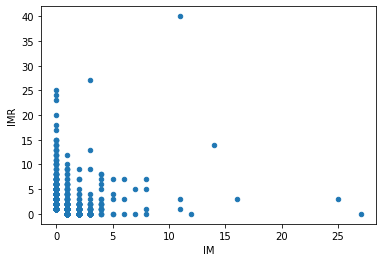

In [279]:
df_overlap.plot(kind='scatter', x='IM', y='IMR')

In [278]:
g = df_split[(df_split.author_surname_initial.isna() == False) & (df_split.author_surname_initial != '')].groupby(['author_surname_initial', 'journal']).journal.count()
df_overlap = g.unstack('journal').fillna(0.0)
df_overlap

journal,IM,IMR
author_surname_initial,,
"Abadan-Unat, N",0.0,6.0
"Abaka, E",0.0,1.0
"Abalos, D",0.0,1.0
"Abandan-Unat, N",0.0,1.0
"Abascal, M",0.0,1.0
...,...,...
"Ávila, F",1.0,0.0
"Åkesson, L",1.0,0.0
"Åslund, O",0.0,1.0


In [277]:
df_split[df_split.author_surname_initial.isna() == False]

,journal,issue_pub_year,article_author,article_author_index_name,article_author_affiliation,author_surname_initial,issue_pub_decade
0,IM,2010,Douglas S. Massey,"Massey, Douglas S",,"Massey, D",2010
1,IM,2010,Nathalie Williams,"Williams, Nathalie",,"Williams, N",2010
2,IM,2010,William G. Axinn,"Axinn, William G",,"Axinn, W",2010
3,IM,2010,Dirgha J. Ghimire,"Ghimire, Dirgha J",,"Ghimire, D",2010
4,IM,2010,Aderanti Adepoju,"Adepoju, Aderanti",,"Adepoju, A",2010
...,...,...,...,...,...,...,...
6769,IMR,1993,Nermin Abadan-unat,"Abadan-Unat, Nermin",University of Ankara,"Abadan-Unat, N",1990
6770,IMR,1993,Silva Meznaric & Jadranka Caci-kumpes,"Meznaric, Silva & Caci-Kumpes, Jadranka",Institute for Migration and Ethnic Studies Uni...,"Meznaric, S",1990
6771,IMR,1993,Masatoshi Muto,"Muto, Masatoshi","Ministry of Foreign Affairs, Tokyo","Muto, M",1990
6772,IMR,1993,Lilia Shevtsova,"Shevtsova, Lilia","USSR Academy of Sciences, Moscow","Shevtsova, L",1990
